# Week 02. Tokens and N-Grams

Sequencing Legal DNA: NLP for Law and Political Economy<br>
Elliott Ash, ETH Zurich

In [1]:
# set random seed
import numpy as np
np.random.seed(4)

In [28]:
#setup
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import pandas as pd
import nltk

In [3]:
# load cleaned data from lesson 1.
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df.columns

Index(['case_name', 'opinion_type', 'date_standard', 'authorship',
       'x_republican', 'maj_judges', 'dissent_judges', 'topic_id',
       'cite_count', 'opinion_text', 'year', 'log_cite_count'],
      dtype='object')

# Basic Pre-Processing and Tokenization

In [4]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

**Sentence Tokenization**

**NLTK has a fast implementation that makes errors.**

In [5]:
from nltk import sent_tokenize
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

['Prof. Zurich hailed from Zurich.', 'She got 3 M.A.', "'s from ETH."]


**spacy works better.**

**Install spacy and the English model if you have not already.**

In [6]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [7]:
# 
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


**Removing capitalization.**

In [8]:
# Capitalization
text_lower = text.lower() # go to lower-case

In [9]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation
punc_remover = str.maketrans('','',punctuation) 
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

prof zurich hailed from zurich she got 3 mas from eth


In [10]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [11]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#' 
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'mas', 'from', 'eth']
['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '#', 'mas', 'from', 'eth']


In [12]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['prof', 'zurich', 'hailed', 'zurich', 'got', '#', 'mas', 'eth']


In [ ]:
# scikit-learn stopwords
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

In [ ]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:20]

In [13]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in tokens]
print(tokens_stemmed)

['prof', 'zurich', 'hail', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [14]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [15]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
wnl.lemmatize('corporation'), wnl.lemmatize('corporations')

('corporation', 'corporation')

Let's wrap it into a recipe.

In [17]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the Supreme Court Cases Corpus.

In [18]:
df['tokens_cleaned'] = df['opinion_text'].apply(normalize_text)
df['tokens_cleaned']

0      [justic, ginsburg, deliv, opinion, court, moti...
1      [justic, steven, deliv, opinion, court, unit, ...
2      [justic, oconnor, deliv, opinion, court, confr...
4      [justic, kennedi, deliv, opinion, court, state...
5      [justic, kennedi, deliv, opinion, court, case,...
                             ...                        
815    [justic, breyer, deliv, opinion, court, appeal...
816    [justic, souter, deliv, opinion, court, questi...
817    [justic, scalia, deliv, opinion, court, case, ...
818    [justic, thoma, deliv, opinion, court, control...
819    [justic, oconnor, deliv, opinion, courtthi, ca...
Name: tokens_cleaned, Length: 768, dtype: object

**Shortcut: `gensim.simple_preprocess`.**

In [19]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [20]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


Now let's `simple_preprocess` on the Supreme Court corpus.

In [21]:
df['tokens_simple'] = df['opinion_text'].apply(simple_preprocess)
df['tokens_simple']

0      [justice, ginsburg, delivered, the, opinion, o...
1      [justice, stevens, delivered, the, opinion, of...
2      [justice, connor, delivered, the, opinion, of,...
4      [justice, kennedy, delivered, the, opinion, of...
5      [justice, kennedy, delivered, the, opinion, of...
                             ...                        
815    [justice, breyer, delivered, the, opinion, of,...
816    [justice, souter, delivered, the, opinion, of,...
817    [justice, scalia, delivered, the, opinion, of,...
818    [justice, thomas, delivered, the, opinion, of,...
819    [justice, connor, delivered, the, opinion, of,...
Name: tokens_simple, Length: 768, dtype: object

## Tagging Parts of Speech

In [29]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

#nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

Plot nouns and adjectives over time.

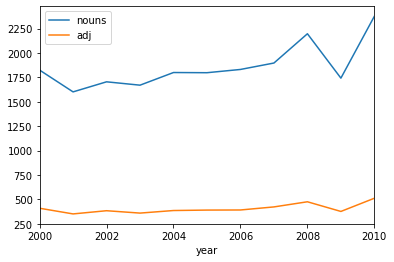

In [27]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N'])
    num_adj = len([t for t in tags if t[0] == 'J'])
    return num_nouns, num_adj

df['nouns'], df['adj'] = zip(*df['opinion_text'].map(get_nouns_adj))
df.groupby('year')[['nouns','adj']].mean().plot()

In [30]:
# Get list of nouns, adjectives, and verbs from WordNet
# nltk.download('wordnet')
from nltk import wordnet as wn

nouns = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('n')])

adjectives = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('a')])

verbs = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('v')])

# Corpus Prep with spaCy

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [32]:
dfs = df.sample(10)
dfs['doc'] = dfs['opinion_text'].apply(nlp)

In [35]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[1]
sent1 # sentence

The Railroad Revitalization and Regulatory Reform Act of 1976 prohibits States from discriminating against railroads by taxing railroad property more heavily than other commercial property in the State.  

In [36]:
# tokens
list(sent1) 

[The,
 Railroad,
 Revitalization,
 and,
 Regulatory,
 Reform,
 Act,
 of,
 1976,
 prohibits,
 States,
 from,
 discriminating,
 against,
 railroads,
 by,
 taxing,
 railroad,
 property,
 more,
 heavily,
 than,
 other,
 commercial,
 property,
 in,
 the,
 State,
 .,
  ]

In [37]:
# lemmas
[x.lemma_ for x in sent1]

['the',
 'Railroad',
 'Revitalization',
 'and',
 'Regulatory',
 'Reform',
 'Act',
 'of',
 '1976',
 'prohibit',
 'state',
 'from',
 'discriminate',
 'against',
 'railroad',
 'by',
 'tax',
 'railroad',
 'property',
 'more',
 'heavily',
 'than',
 'other',
 'commercial',
 'property',
 'in',
 'the',
 'State',
 '.',
 ' ']

In [38]:
# POS tags
[x.tag_ for x in sent1]

['DT',
 'NNP',
 'NNP',
 'CC',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'CD',
 'VBZ',
 'NNS',
 'IN',
 'VBG',
 'IN',
 'NNS',
 'IN',
 'VBG',
 'NN',
 'NN',
 'RBR',
 'RB',
 'IN',
 'JJ',
 'JJ',
 'NN',
 'IN',
 'DT',
 'NNP',
 '.',
 '_SP']

Analyzing a Corpus with spaCy data

In [40]:
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x)))
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x.sents)))


print(len(tokens),'words in corpus.')
words_per_sent = len(tokens) / len(sentences)
print(words_per_sent,'words per sentence.')

35 words in corpus.
17.5 words per sentence.


# N-grams

In [41]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['opinion_text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 2503),
 (('l.', 'ed.'), 2197),
 (('s.', 'ct.'), 1898),
 (('ed.', '2d'), 1618),
 (('l.', 'ed.', '2d'), 1618),
 (('that', 'the'), 1200),
 (('to', 'the'), 1077),
 (('in', 'the'), 951)]

# Tokenizers

In [42]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 398),
 ('of', 295),
 ('to', 148),
 ('a', 126),
 ('that', 110),
 ('supervised', 95),
 ('and', 78),
 ('in', 76),
 ('release', 71),
 ('is', 65),
 ('term', 64),
 ('§', 56),
 ('v.', 49),
 ('for', 45),
 ('at', 43),
 ('united', 42),
 ('not', 41),
 ('it', 41),
 ('states', 38),
 ('as', 38)]

Usually we use scikit-learn's vectorizer.

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(df['opinion_text'])

# save the vectors
pd.to_pickle(X,'X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [45]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['opinion_text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [46]:
X_tfidf

<768x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 300968 stored elements in Compressed Sparse Row format>

Make word cloud of common words by topic id.

In [47]:
df['topic_id'].value_counts() 

1.0     217
8.0     153
2.0     117
9.0      90
3.0      53
10.0     49
4.0      24
5.0      18
12.0     14
7.0      14
6.0      12
11.0      5
13.0      2
Name: topic_id, dtype: int64

In [48]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['000', '10', '100', '101', '102', '103', '103 ct', '104', '104 ct', '105'],
 ['waters',
  'way',
  'west',
  'word',
  'words',
  'work',
  'writ',
  'year',
  'years',
  'york'])

1


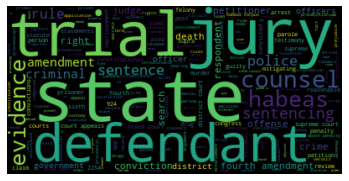

2


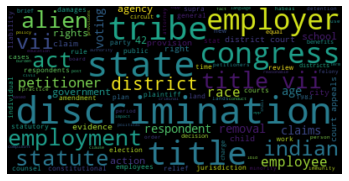

8


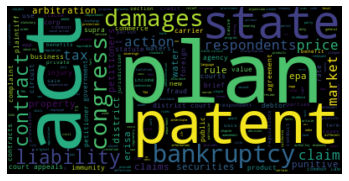

9


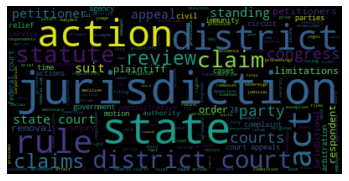

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic_id'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

In [ ]:
# customer tokenizers and stemmers

In [53]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10)
X_hash = hv.fit_transform(df['opinion_text'])
X_hash

<768x10 sparse matrix of type '<class 'numpy.float64'>'
	with 7680 stored elements in Compressed Sparse Row format>

**Collocations: Point-Wise Mutual Information.**

In [54]:
from operator import mul
from functools import reduce
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def get_gmean(phrase, termfreqs):
    words = phrase.split('_')
    n = len(words)
    p = [termfreqs[w]**(1/n) for w in words]
    numerator = termfreqs[phrase]   
    denominator = reduce(mul, p)
    if denominator == 0:
        return 0
    gmean = numerator / denominator
    return gmean

POS-filtered N-grams

In [83]:
from collections import Counter

# Normalized Penn tags
tagdict = { 'NN':'N',
            'NNS':'N',
                                    
            'JJ':'A',
            'JJR':'A',
            'JJS':'A',
            'VBG':'A', # gerunds/participles treated like adjectives

            'RB':'A', # adverbs treated as adjectives
            'RBR':'A',
            'RBS':'A',
            'PDT':'A', # predeterminer            

            'VB':'V',
            'VBD':'V',
            'VBN':'V',
            'VBP':'V',
            'VBZ':'V',
            'MD': 'V', # modals treated as verbs
            'RP': 'V', # particles treated as verbs
            
            'DT':'D',
                        
            'IN':'P',
            'TO':'P',

            'CC': 'C'}

tagpatterns = {'A','N','V','P','C','D',
           'AN','NN', 'VN', 'VV', 
            #'NV',
            'VP',                                    
            'NNN','AAN','ANN','NAN','NPN',
            'VAN','VNN', 'AVN', 'VVN',
            'VPN', 'VDN', 
            #'ANV','NVV','VVV', 'NNV',
            'VVP','VAV','VVN',
            'NCN','VCV', 'ACA',  
            'PAN',
            'NCVN','ANNN','NNNN','NPNN', 'AANN' 'ANNN','ANPN','NNPN','NPAN', 
            'ACAN', 'NCNN', 'NNCN', 'ANCN', 'NCAN',
            'PDAN', 'PNPN',
            'VDNN', 'VDAN','VVDN'}

def count_pos_grams(sentence, max_phrase_length=4):
    sent_freq = Counter()
    tagwords = []
    for (word,tag) in tagger.tag(sentence):
        if tag in tagdict:
            normtag = tagdict[tag]
            stemmed = word.lower()#stemmer.stem(word)
            tagwords.append((stemmed,normtag))
        else:
            tagwords.append(None)
    for n in range(1,max_phrase_length+1):            
        rawgrams = ngrams(tagwords,n)
        for rawgram in rawgrams:
            # skip grams that have rare words
            if None in rawgram:
                continue
            gramtags = ''.join([x[1][0] for x in rawgram])
            if gramtags in tagpatterns:
                 # if tag sequence is allowed, add to counter
                gram = '_'.join([x[0] for x in rawgram])
                sent_freq[gram] += 1
    return sent_freq

In [84]:
max_phrase_length = 4
termfreqs = Counter()

for i, doc in dfs.iterrows():    
    termfreqs.update(count_pos_grams(nltk.word_tokenize(doc['opinion_text'])))
        


In [85]:
# filter out unigrams
grams = [x for x in termfreqs.most_common() if '_' in x[0]]
# make dataframe of geometric mean associations for each gram
gmeans = pd.DataFrame([(gram[0], get_gmean(gram[0],termfreqs)) for gram in grams],
              columns=['ngram','gmean'])
gmeans.sort_values('gmean',ascending=False)

,ngram,gmean
388,restricted_visibility,1.000000
8673,assisted_suicide,1.000000
2698,ancient_script,1.000000
8233,potassium_chloride,1.000000
2781,disadvantaged_children,1.000000
...,...,...
2862,have_of,0.002189
791,is_of,0.002148
8141,to_the_federal_case,0.002084
3806,be_of,0.001508


CountVectorizer can be run directly on tokens so you can run it on the phrased documents, for example.

In [99]:
#token_vec = CountVectorizer(min_df=0.01, # at min 1% of docs
#                            max_df=.9,  
#                            max_features=10000,                                                
#                            preprocessor =lambda x: x, # for tokens
#                            tokenizer = lambda x: x, # for tokens
#                            stop_words='english',
#                            ngram_range=(1,1))
#X_pos = vec.fit_transform(df['tokens_cleaned'])


In [106]:
# spacy noun chunks
# NER noun chunks
i = 0
for chunk in nlp(doc['opinion_text']).noun_chunks:
    print ('{} - {}'.format(chunk, chunk.label_))
    if i > 10:
        break
    i += 1

Justice Kennedy - NP
the opinion - NP
the Court - NP
These cases - NP
us - NP
the validity - NP
the Partial-Birth Abortion Ban Act - NP
(Act - NP
2000 ed - NP
Supp. IV - NP
a federal statute - NP
abortion procedures - NP


# Feature Selection

In [109]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['cite_count']
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['grant',
 'judicial',
 'judgment court',
 'review',
 'remedies',
 'adopted',
 'agency',
 'turn',
 'contrast',
 'history']

In [110]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['92',
 'element',
 'nation',
 'cases',
 'given',
 'primary',
 'reach',
 'election',
 'cost',
 '36']

In [111]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['limitations',
 'charged',
 '177',
 '91',
 'include',
 '99',
 '108',
 'initial',
 'code ann',
 'days']

In [122]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[-10:]]

['favor',
 'equitable',
 'entitled',
 'banks',
 'debtor',
 'capital',
 'districts',
 'arbitration',
 'voting',
 'minority']

In [119]:
###
# OLS Regression
###

# list of words from our vectorizer
#vocab = [w.replace(' ', '_') for w in vocab]
         
# convert frequency counts to dataframe
#df4 = pd.DataFrame(X.todense(),
#                   columns=vocab)

# import statsmodels package for R-like regression formulas
#import statsmodels.formula.api as smf

# add metadata
#df4['Y'] = df['log_cite_count'] # cites to this opinion
#df4['judgefe'] = df['authorship']   # judge fixed effect
#df4['yearfe'] = pd.to_datetime(df['date_standard']).dt.year        # year fixed effect

In [120]:
# empty lists for t-statistics and coefficients
#tstats, betas = [], []

#for xvar in vocab: # loop through the words in vocab
#    if any([c.isdigit() for c in xvar]) or 'hellip' in xvar:
#        tstats.append(0)
#        betas.append(0)
#        continue
#    model = smf.ols('Y ~ %s' % xvar,data=df4)                
#    result = model.fit() 
#    tstats.append(result.tvalues[1])
#    betas.append(result.params[1])
            
# zip up words and t-statistics
#stats = list(zip(vocab,tstats))
#stats.sort(key = lambda x: x[1], reverse=True) # sort by second item (tstats)
#stats[:10] + stats[-10:]